In [11]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt

class Landmark:
    def __init__(self,x,y):
        self.position = np.array([x,y])
        
    def __str__(self):
        return "(%f,%f)" % (self.position[0],self.position[1]) 
    
    def getX(self):
        return self.position[0]
    
    def getY(self):
        return self.position[1]
    

In [12]:
actual_landmarks = (Landmark(-0.5,0),Landmark(0.5,0),Landmark(0,0.5))

In [13]:
xs = [e.getX() for e in actual_landmarks]
ys = [e.getY() for e in actual_landmarks]

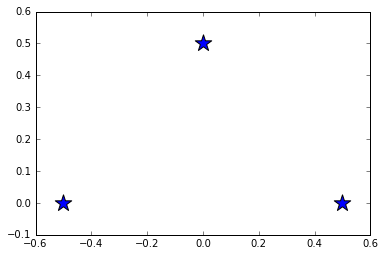

In [14]:
plt.scatter(xs,ys,s=300,marker="*")

In [122]:
class Robot:
    def __init__(self,x,y,rad):
        self.actual_poses = [np.array([x,y,rad])]
        self.guess_poses = [np.array([x,y,rad])]
        self.observed_landmarks = []
        random.seed()
        
        self.step = 0
        
        self.sensor_max_range = 1.0
        self.sensor_min_range = 0.1
        self.sensor_max_angle = math.pi / 2
        self.sensor_min_angle = - math.pi /2 
        
    def getGuessX(self):             return self.guess_poses[-1][0]
    def getGuessY(self):             return self.guess_poses[-1][1]
    def getGuessTheta(self):     return self.guess_poses[-1][2]
    
    def getActualXs(self):           return [e[0] for e in self.actual_poses]
    def getActualYs(self):           return [e[1] for e in self.actual_poses]
    def getActualThetas(self):   return [e[2] for e in self.actual_poses]
    def getActualDXs(self):           return [math.cos(e[2]) for e in self.actual_poses]
    def getActualDYs(self):           return [math.sin(e[2]) for e in self.actual_poses]
    
    def getGuessXs(self):           return [e[0] for e in self.guess_poses]
    def getGuessYs(self):           return [e[1] for e in self.guess_poses]
    def getGuessThetas(self):   return [e[2] for e in self.guess_poses]
    def getGuessDXs(self):   return [math.cos(e[2]) for e in self.guess_poses]
    def getGuessDYs(self):   return [math.sin(e[2]) for e in self.guess_poses]
    
    def getObservationXs(self): return [e["pos"][0] for e in self.observed_landmarks]
    def getObservationYs(self): return [e["pos"][1] for e in self.observed_landmarks]
    
    def printObservations(self):
        for e in self.observed_landmarks:
            print("step: %d, id: %d, measurement: (%f,%f), pos: (%f,%f)" % (e["step"],e["id"],e["measurement"][0],e["measurement"][1],e["pos"][0],e["pos"][1]) )
    
    def move(self,fw,rot):
        self.step += 1
        
        actual_fw = random.gauss(fw,fw/10)    #10% noise
        actual_rot = random.gauss(rot,rot/10) #10% noise
        
        p = self.actual_poses[-1]
        px, py, pt = p[0],p[1],p[2]
        x = px + actual_fw * math.cos(pt)
        y = py + actual_fw * math.sin(pt)
        t = pt + actual_rot
        self.actual_poses.append(np.array([x,y,t]))
        
        g = self.guess_poses[-1]
        gx, gy, gt = g[0],g[1],g[2]
        x = gx + fw * math.cos(gt)
        y = gy + fw * math.sin(gt)
        t = gt + rot
        self.guess_poses.append(np.array([x,y,t]))
        
    def observe(self,landmarks):
        observed = []
        rx,ry,rt = self.getGuessX(),self.getGuessY(),self.getGuessTheta()
        for i,landmark in enumerate(landmarks):
            lx,ly = landmark.getX(),landmark.getY()
            distance = math.sqrt((rx-lx)**2 + (ry-ly)**2)
            if distance > self.sensor_max_range or distance < self.sensor_min_range:
                continue
                
            direction = math.atan2(ly-ry, lx-rx) - rt
            if direction > math.pi:    direction -= 2*math.pi
            if direction < -math.pi:   direction += 2*math.pi
            
            if direction > self.sensor_max_angle or direction < self.sensor_min_angle:
                continue
            
            #add noise
            distance = random.gauss(distance,distance/10)   #10% gauss noise
            direction = random.gauss(direction,math.pi * 10 /180)   #10deg gauss noise
            
            x = rx + distance * math.cos(rt + direction)
            y = ry + distance * math.sin(rt + direction)
            
            self.observed_landmarks.append( {"step":self.step, "id":i, "measurement": (distance,direction),"pos":(x,y)} )
            
            

In [127]:
robot = Robot(0,0,0)

for i in range(20):
    robot.observe(actual_landmarks)
    robot.move(0.3,3.14/6)

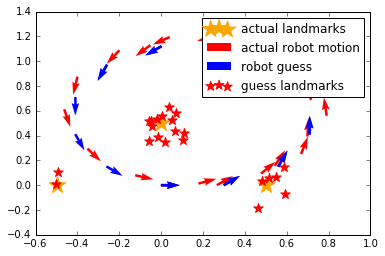

In [128]:
plt.scatter(xs,ys,s=300,marker="*",label="actual landmarks",color="orange")
plt.quiver(robot.getActualXs(),robot.getActualYs(),robot.getActualDXs(),robot.getActualDYs(),
           color="red",label="actual robot motion")
plt.quiver(robot.getGuessXs(),robot.getGuessYs(),robot.getGuessDXs(),robot.getGuessDYs(),
           color="blue",label="robot guess")
plt.scatter(robot.getObservationXs(),robot.getObservationYs(),s=100,marker="*",label="guess landmarks",color="red")
plt.legend()